In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
with open('input.csv', 'r') as f:
    raw_df= pd.read_csv(f)
raw_df

,air_temp,albedo,azimuth,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,...,gti,precipitable_water,precipitation_rate,relative_humidity,surface_pressure,wind_direction_10m,wind_speed_10m,zenith,period_end,period
0,7,0.12,-21,0,0,0,0,38.1,4.8,0,...,0,11.2,0.0,84.7,1003.2,336,2.7,158,2024-01-01T00:05:00+00:00,PT5M
1,7,0.12,-24,0,0,0,0,39.5,4.8,0,...,0,11.2,0.0,84.8,1003.2,336,2.8,157,2024-01-01T00:10:00+00:00,PT5M
2,7,0.12,-26,0,0,0,0,38.1,4.8,0,...,0,11.1,0.0,84.8,1003.3,336,2.8,157,2024-01-01T00:15:00+00:00,PT5M
3,7,0.12,-29,0,0,0,0,38.1,4.8,0,...,0,11.1,0.0,84.9,1003.3,336,2.8,157,2024-01-01T00:20:00+00:00,PT5M
4,7,0.12,-32,0,0,0,0,39.5,4.8,0,...,0,11.1,0.0,84.9,1003.3,335,2.8,156,2024-01-01T00:25:00+00:00,PT5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105403,9,0.13,-5,0,0,0,0,33.8,6.4,0,...,0,12.3,0.0,86.1,1024.6,150,2.0,159,2024-12-31T23:40:00+00:00,PT5M
105404,9,0.13,-9,0,0,0,0,40.9,6.4,0,...,0,12.3,0.0,86.1,1024.6,150,2.0,159,2024-12-31T23:45:00+00:00,PT5M
105405,9,0.13,-12,0,0,0,0,42.2,6.4,0,...,0,12.3,0.0,86.1,1024.6,150,2.0,158,2024-12-31T23:50:00+00:00,PT5M
105406,9,0.13,-15,0,0,0,0,43.6,6.4,0,...,0,12.3,0.0,86.1,1024.5,150,2.0,158,2024-12-31T23:55:00+00:00,PT5M


In [5]:
def take_useful_columns(df):
    return df[['period_end', 'air_temp', 'ghi']]

def timestamp_to_datetime(df):
    df.loc[:,'period_end'] = pd.to_datetime(df.loc[:,'period_end'])
    return df

def rename_columns(df):
    return df.rename(columns={'period_end': 'time',
                            'air_temp': 'temperature',
                            'ghi': 'irradiance'})

def augment_to_intervals_in_seconds(df, dt=15):
    string_dt= str(dt)+'s'
    df = df.set_index('time').resample(string_dt).asfreq().reset_index()
    df['temperature'] = df['temperature'].interpolate(method='linear')
    df['irradiance'] = df['irradiance'].interpolate(method='linear')
    return df

In [6]:
df_final= (raw_df
                .pipe(take_useful_columns)
                .pipe(timestamp_to_datetime)
                .pipe(rename_columns)
                .pipe(augment_to_intervals_in_seconds,dt=15))

C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


### check

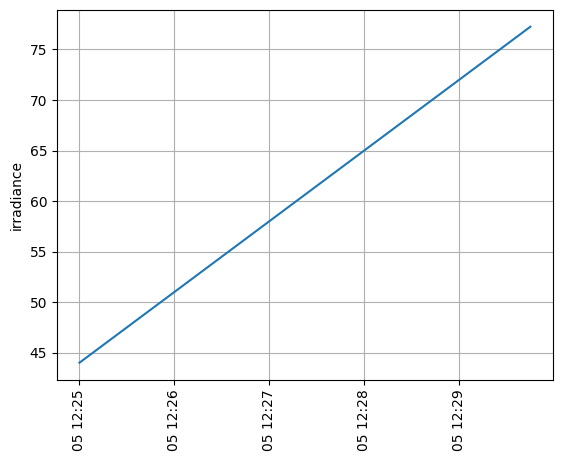

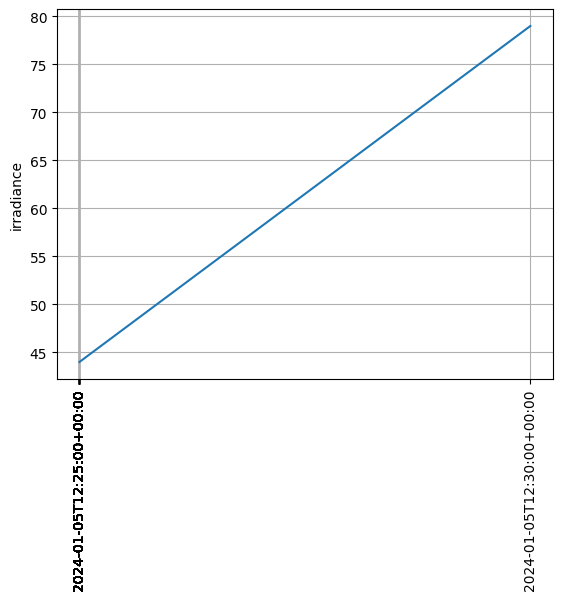

In [25]:
t1_b= 1300
dt_b= 2

t1= t1_b*20
dt= dt_b*10

plt.plot(df_final['time'].iloc[t1:t1+dt],  df_final['irradiance'].iloc[t1:t1+dt])
plt.ylabel('irradiance')
plt.xticks(rotation=90)
plt.grid()
plt.show()

t1= t1_b
dt= dt_b

plt.plot(raw_df['period_end'].iloc[t1:t1+dt], raw_df['ghi'].iloc[t1:t1+dt])
plt.ylabel('irradiance')
xticks_idx = np.linspace(t1, t1+dt-1, 30, dtype=int)
plt.xticks(raw_df['period_end'].iloc[xticks_idx], rotation=90)
plt.grid()
plt.show()

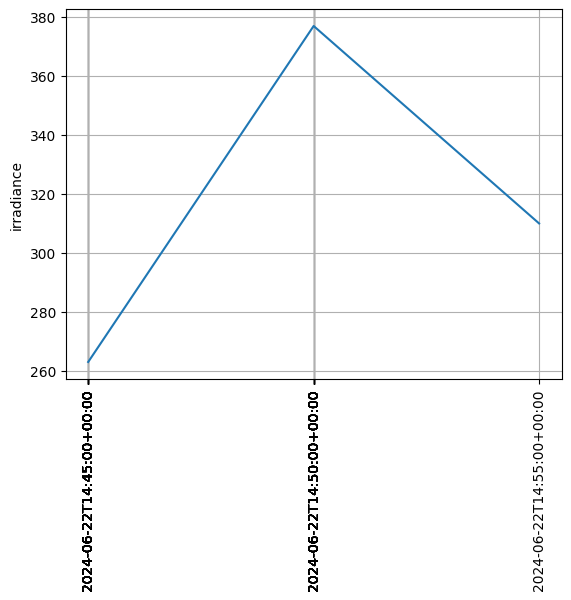

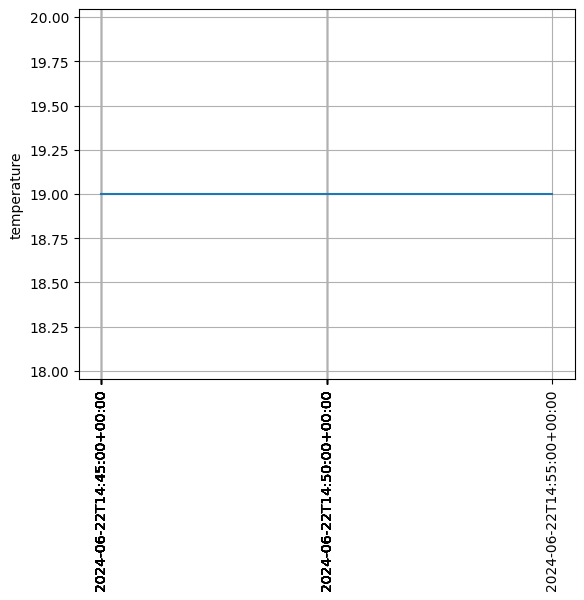

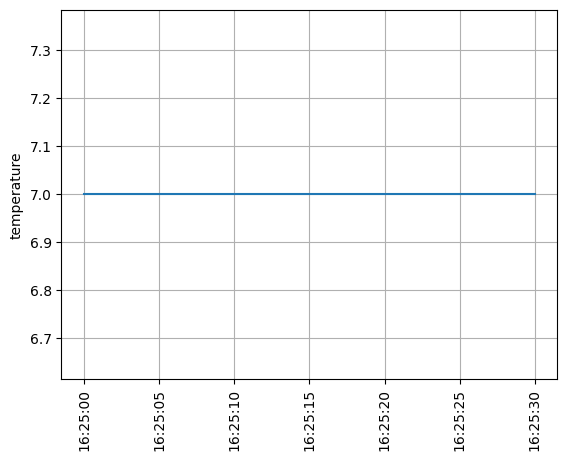

In [14]:
plt.plot(raw_df['period_end'].iloc[t1:t1+dt],  raw_df['air_temp'].iloc[t1:t1+dt])
xticks_idx = np.linspace(t1, t1+dt-1, 30, dtype=int)
plt.xticks(raw_df['period_end'].iloc[xticks_idx], rotation=90)
plt.ylabel('temperature')
plt.xticks(rotation=90)
plt.grid()
plt.show()

plt.plot(df_final['time'].iloc[t1:t1+dt],  df_final['temperature'].iloc[t1:t1+dt])
plt.ylabel('temperature')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [87]:
df_final.head(10)

,time,temperature,irradiance
0,2024-01-01 00:05:00+00:00,7.0,0.0
1,2024-01-01 00:05:15+00:00,7.0,0.0
2,2024-01-01 00:05:30+00:00,7.0,0.0
3,2024-01-01 00:05:45+00:00,7.0,0.0
4,2024-01-01 00:06:00+00:00,7.0,0.0
5,2024-01-01 00:06:15+00:00,7.0,0.0
6,2024-01-01 00:06:30+00:00,7.0,0.0
7,2024-01-01 00:06:45+00:00,7.0,0.0
8,2024-01-01 00:07:00+00:00,7.0,0.0
9,2024-01-01 00:07:15+00:00,7.0,0.0


In [88]:
df_final.tail(10)

,time,temperature,irradiance
2108131,2024-12-31 23:57:45+00:00,9.0,0.0
2108132,2024-12-31 23:58:00+00:00,9.0,0.0
2108133,2024-12-31 23:58:15+00:00,9.0,0.0
2108134,2024-12-31 23:58:30+00:00,9.0,0.0
2108135,2024-12-31 23:58:45+00:00,9.0,0.0
2108136,2024-12-31 23:59:00+00:00,9.0,0.0
2108137,2024-12-31 23:59:15+00:00,9.0,0.0
2108138,2024-12-31 23:59:30+00:00,9.0,0.0
2108139,2024-12-31 23:59:45+00:00,9.0,0.0
2108140,2025-01-01 00:00:00+00:00,9.0,0.0


### save df

In [89]:
# save df to csv
df_final.to_csv('outdoor_variables_15s.csv', index=False)